In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
tips = sns.load_dataset("tips")

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
# Saving the dataframe into csv file

tips.to_csv('tips.csv', index=False)

In [5]:
pwd

'/Users/aishwaryamaiya/Documents/PGDA-43 Python'

In [6]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [7]:
tips.shape

(244, 7)

In [8]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [9]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [10]:
# Install required libraries
get_ipython().system('pip install statsmodels scipy plotly')

In [11]:
# Import additional libraries
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
import statsmodels.api as sm

In [12]:
# Basic statistics for numerical columns
print("Basic Statistical Summary:")
print(tips.describe())

Basic Statistical Summary:
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


In [13]:
# Categorical columns summary

print("\nCategorical Columns Distribution:")

for col in tips.select_dtypes(include=["object", "category"]).columns:
    print(f"\n{col.upper()} Distribution:")
    counts = tips[col].value_counts()
    percents = tips[col].value_counts(normalize=True)
    for category in counts.index:
        print(f"  {category}: {percents[category]*100:.1f}% ({counts[category]})")


Categorical Columns Distribution:

SEX Distribution:
  Male: 64.3% (157)
  Female: 35.7% (87)

SMOKER Distribution:
  No: 61.9% (151)
  Yes: 38.1% (93)

DAY Distribution:
  Sat: 35.7% (87)
  Sun: 31.1% (76)
  Thur: 25.4% (62)
  Fri: 7.8% (19)

TIME Distribution:
  Dinner: 72.1% (176)
  Lunch: 27.9% (68)


### **Data Distribution Report**

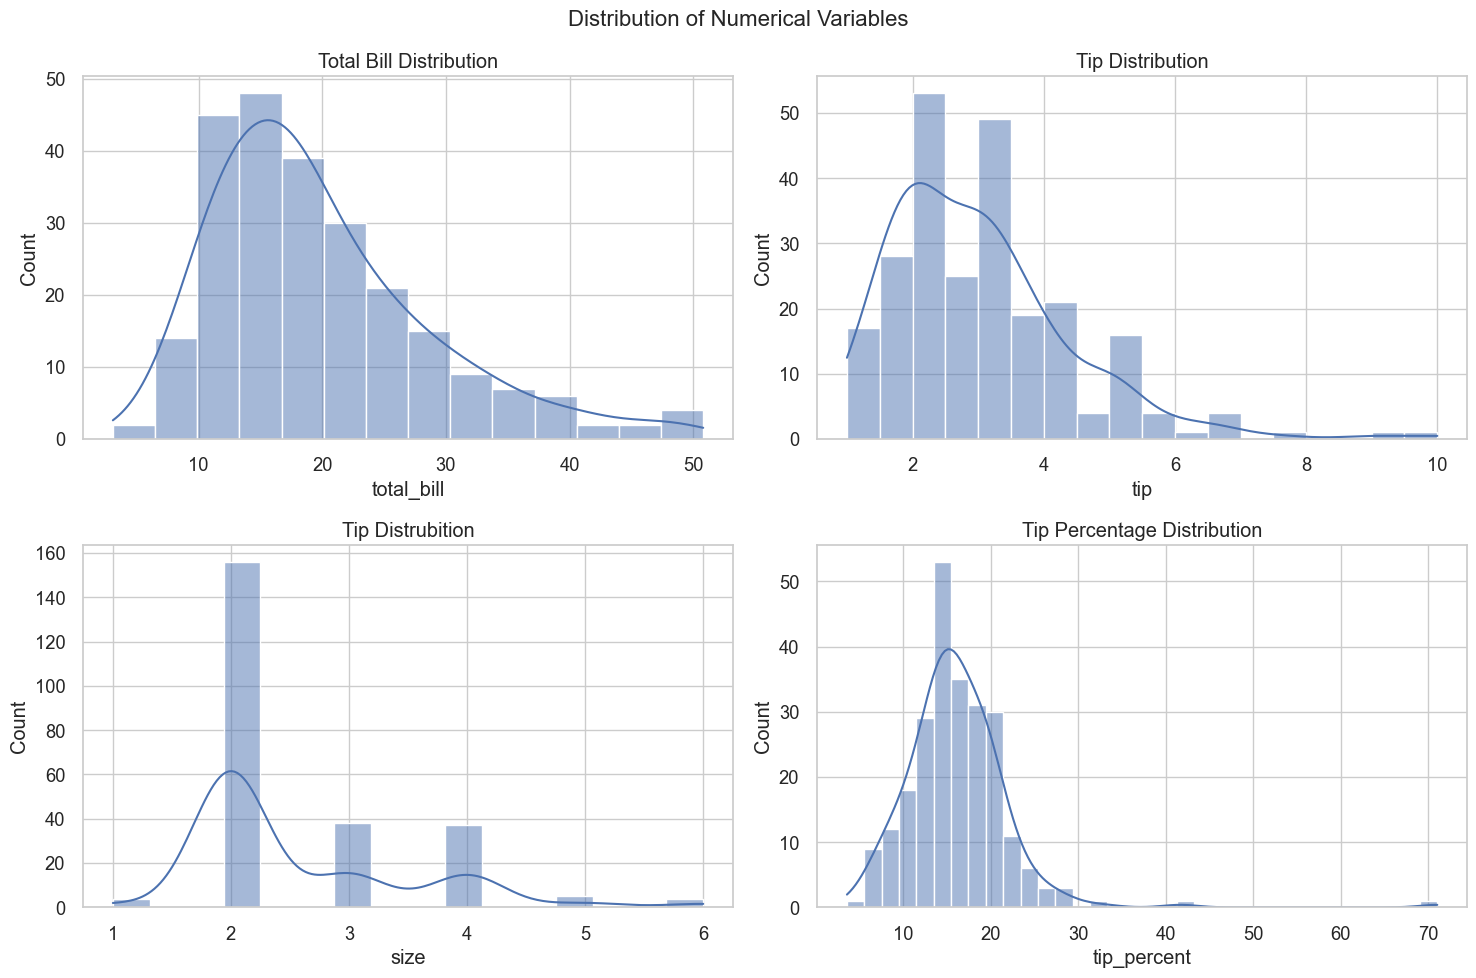


Normality Tests (Shapiro-Wilk)
total_bill: p-value = 0.0000
tip: p-value = 0.0000
tip_percent: p-value = 0.0000


In [14]:
plt.style.use("seaborn-v0_8")
sns.set_theme(style = "whitegrid")
sns.set_context("notebook", font_scale = 1.2)

# Creating distribution plots for numerical variables

fig, axes = plt.subplots(2, 2, figsize = (15, 10))
fig.suptitle("Distribution of Numerical Variables", fontsize = 16)

# Total Bill Distribution

sns.histplot(data = tips, x = "total_bill", kde = True, ax = axes[0,0])
axes[0,0].set_title("Total Bill Distribution")

# Tip Distrubition

sns.histplot(data = tips, x= "tip", kde = True, ax = axes[0,1])
axes[0,1].set_title('Tip Distribution')

# Size Distrubition

sns.histplot(data = tips, x = "size", kde = True, ax = axes[1,0])
axes[1,0].set_title("Tip Distrubition")

# Tip Percentage Distribution

tips["tip_percent"] = (tips["tip"]/tips["total_bill"])*100
sns.histplot(data = tips, x = "tip_percent", kde = True, ax =axes[1,1])
axes[1,1].set_title("Tip Percentage Distribution")

plt.tight_layout()
plt.show()

# Test for normality

print("\nNormality Tests (Shapiro-Wilk)")
for col in ["total_bill", "tip", "tip_percent"]:
    stat, p_value = stats.shapiro(tips[col])
    print(f"{col}: p-value = {p_value:.4f}")

Observations:
1. Total Bill: Right-skewed distribution, indicating more frequent lower bills with some high-
value outliers
2. Tips: Similar right-skewed pattern, most tips are in lower ranges
3. Party Size: Discrete distribution, most common are parties of 2
4. Tip Percentage: Approximately normal distribution centered around 15%

### **Data Comparison Report**

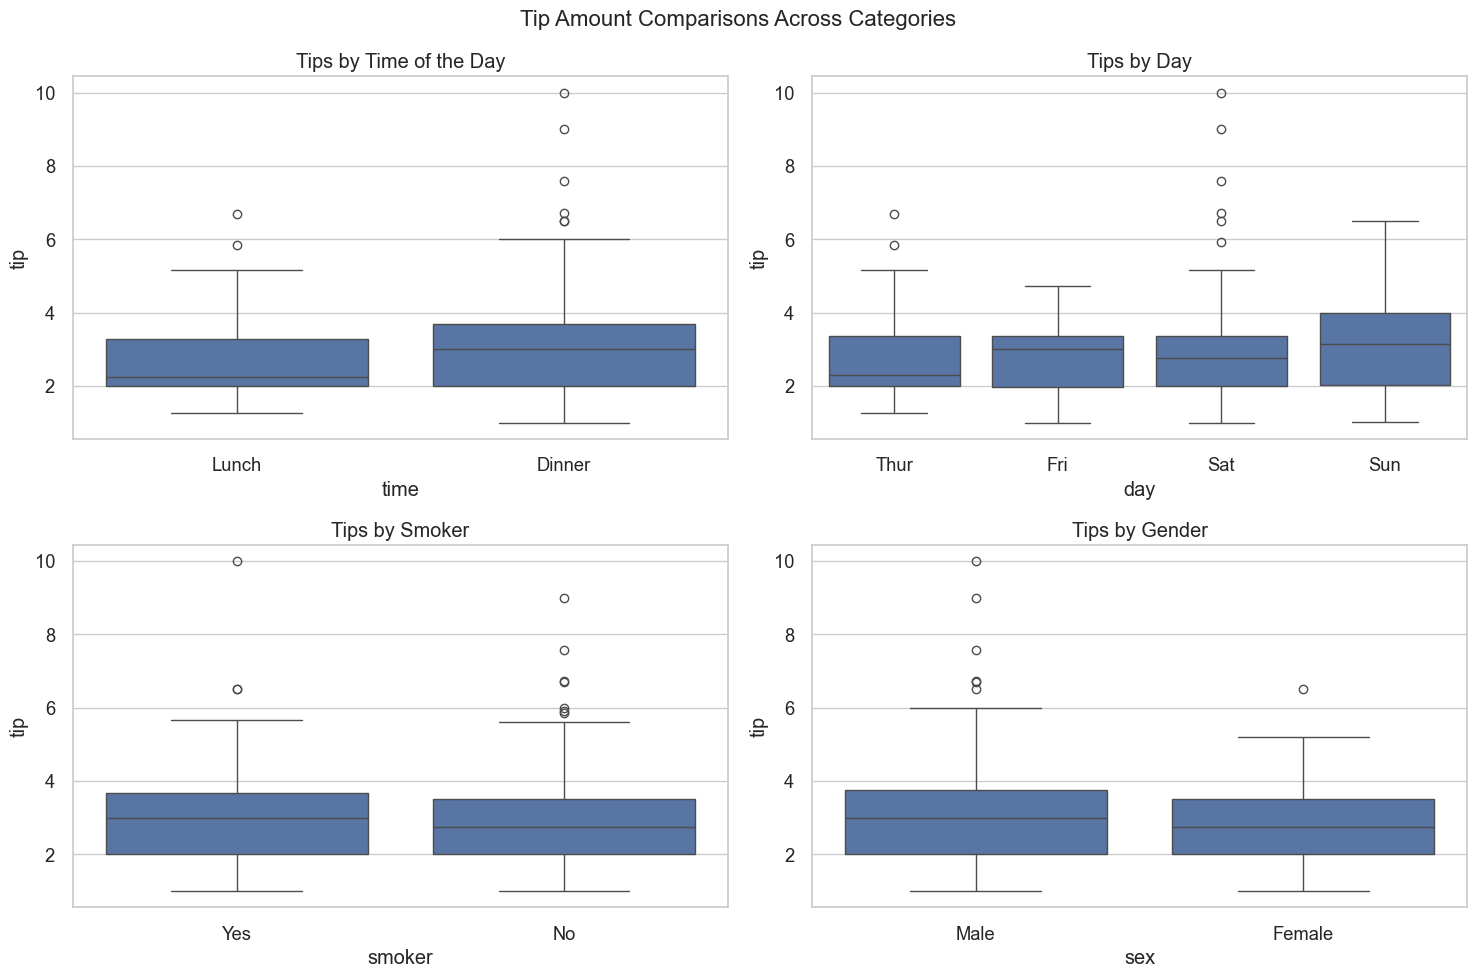

In [15]:
# Creating box plots for categorical comparisons

fig = plt.figure(figsize = (15, 10))
plt.suptitle("Tip Amount Comparisons Across Categories", fontsize = 16)

# Time of the Day vs Tip
plt.subplot(2,2,1)
sns.boxplot(data = tips, x = "time", y = "tip")
plt.title("Tips by Time of the Day")


# Day vs Tip
plt.subplot(2,2,2)
sns.boxplot(data = tips, x = "day", y = "tip")
plt.title("Tips by Day")


# Smoker vs Tip
plt.subplot(2,2,3)
sns.boxplot(data = tips, x = "smoker", y = "tip")
plt.title("Tips by Smoker")

# Gender vs Tip
plt.subplot(2,2,4)
sns.boxplot(data = tips, x = "sex", y = "tip")
plt.title("Tips by Gender")

plt.tight_layout()
plt.show()


Observations:

1. Time of Day: Dinner tips tend to be higher than lunch tips
2. Day of Week: Weekend days (Fri-Sun) show slightly higher tips
3. Smoker Status: No significant difference in tip amounts
4. Gender: Male customers tend to leave slightly higher tips

In [16]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percent
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


In [17]:
# Statistical Methods on Categorical Data

print("\nMann-Whitney U Tests:")

# Testing time difference

stat, p_value = stats.mannwhitneyu(
    tips[tips["time"] == "Lunch"]["tip"],
    tips[tips["time"] == "Dinner"]["tip"]
)
print(f"Time of the Day(Lunch or Dinner): p-value = {p_value:.4f}")

#Testing smoker difference
stat, p_value = stats.mannwhitneyu(
    tips[tips["smoker"] == "Yes"]["tip"],
    tips[tips["smoker"] == "No"]["tip"]
)
print(f"Smoker vs Non-Smoker: p-value = {p_value:.4f}")


Mann-Whitney U Tests:
Time of the Day(Lunch or Dinner): p-value = 0.0288
Smoker vs Non-Smoker: p-value = 0.7919


### **Data Relationship Report**

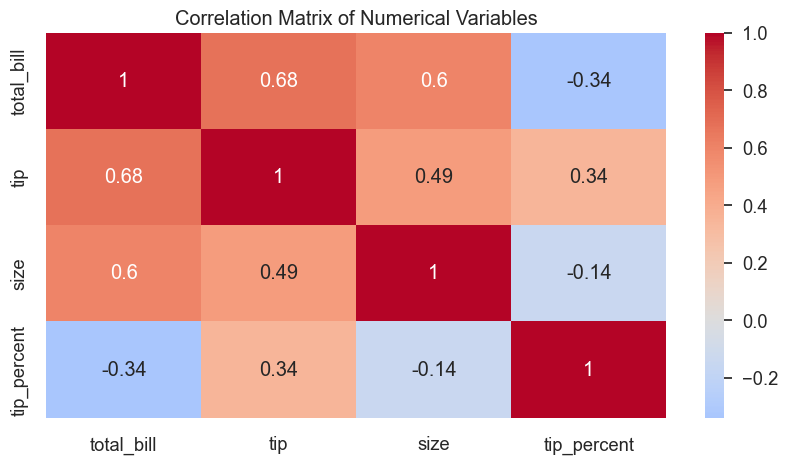


Regression Analysis Summary:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.000       0.606       1.235
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120


<Figure size 800x550 with 0 Axes>

In [19]:
# Creating correlation matrix

numerical_cols = ["total_bill", "tip", "size", "tip_percent"]
correlation_matrix = tips[numerical_cols].corr()

# Plot correlation matrix

plt.figure(figsize = (10, 5))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", center = 0)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

# Create scatter plot with regession line using plotly

fig = px.scatter(tips, x = "total_bill", y = "tip", 
                 color = "time", size = "size", 
                 trendline = "ols",
                 title = "Relationship between Total Bill and Tip")

plt.tight_layout()
fig.show()

# Perform regression analysis

X = tips["total_bill"]
y = tips["tip"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print("\nRegression Analysis Summary:")
print(model.summary().tables[1])